
# Project: Investigate tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> tmdb-movies contains information about 10,000 movies collected from The Movie Database (TMDb) used to investigate and analyze
to answer follwing questions:

>1-What are the profits of the last ten years?

>2-what are genres has more than 100 counts of movies ? how was revenue , budget and counts for it?

>3-For top 10 directors in century 21, How many moives they directed ? what 's the revenue for each one of them?

>4-What is the name ,revenue,budget and gender for the best and worst movies from revenue perspective?

>5-what's the correlation between budget and revenue?

>6-what's the correlation between runtime and budget?

>7-what's the distribution  of revenue and budget?



In [93]:
#import libraries used
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


> First step load data ,take quick look on it to determine clean stage



### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdb=pd.read_csv('tmdb-movies.csv')
df_tmdb.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [19]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
>start Clean stage

>Remove unnecessary columns like(id	,imdb_id,popularity,homepage,tagline,overview,vote_count,vote_average
,keywords,cast,production_companies	)



>Drop null value

>Remove duplicates rows

>Replace 0 values in budget& Revenue by mean

In [57]:
# Remove unnecessary columns
df_tmdb.drop(['id','imdb_id','popularity','homepage','tagline','overview','vote_count','vote_average','keywords','cast','production_companies'],axis=1,inplace=True)


df_tmdb.head(1)

,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [58]:
#Drop null value
df_tmdb.dropna(inplace = True)

In [59]:
#Remove duplicates rows
df_tmdb.drop_duplicates(inplace = True)

In [60]:
#check 0 values in revenue
df_tmdb.revenue.isin([0]).sum()

5952

In [61]:
#check 0 values in budget
df_tmdb.budget.isin([0]).sum()

5636

In [62]:
#replace 0 values to mean value for colunm
df_tmdb['revenue']=df_tmdb['revenue'].replace(0,df_tmdb['revenue'].mean())

In [63]:
#check 0 values after update
df_tmdb.revenue.isin([0]).sum()

0

In [64]:
#replace 0 values to mean value for colunm
df_tmdb['budget']=df_tmdb['budget'].replace(0,df_tmdb['budget'].mean())

In [65]:
#check 0 values after update
df_tmdb.budget.isin([0]).sum()

0

In [23]:
#1-check changes 
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_date      10800 non-null object
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 928.1+ KB


In [24]:
#2-check changes 
df_tmdb.head(1)

,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [113]:
#3-check changes 
df_tmdb.describe()

,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,1.080100e+04,1.080100e+04,10801.000000,10801.000000,1.080100e+04,1.080100e+04
mean,1.471255e+07,4.006196e+07,102.188779,2001.290343,1.765551e+07,5.167244e+07
std,3.098568e+07,1.173144e+08,30.782604,12.819226,3.438265e+07,1.450123e+08
min,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,1.577495e+07,2.453851e+07,111.000000,2011.000000,2.103337e+07,3.408478e+07
max,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 What are the profits of the last ten years?

In [24]:
#determine Max year
df_tmdb['release_year'].max()

2015

''

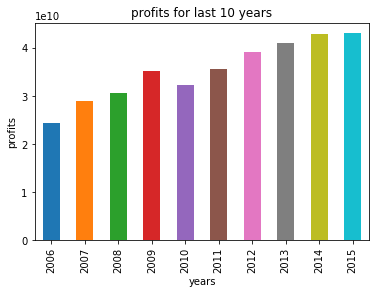

In [105]:
#create new data frame to contain last 10 years
df_tmdb_lastY=df_tmdb[df_tmdb['release_year']>2005]

# sum revenue , group by relase year and represent by bars
df_tmdb_lastY.groupby('release_year')['revenue'].sum().plot(kind='bar',title='profits for last 10 years')

#labels 

plt.xlabel('years')
plt.ylabel('profits')
;

# Finding
>2015 was the highest profit year and its different from 2014 by small percentage

> in last 10 years revenue increaceing and decreace for once in 2010 and reincreace again

>2006 was lowest year

###  Question 2 what are genres  has more than 100 counts of movies ? how was  revenue , budget and counts for it?

In [26]:
df_tmdb['genres'].value_counts() >100

Drama                                               True
Comedy                                              True
Documentary                                         True
Drama|Romance                                       True
Comedy|Drama                                        True
Comedy|Romance                                      True
Horror|Thriller                                     True
Horror                                              True
Comedy|Drama|Romance                                True
Drama|Thriller                                      True
Comedy|Family                                       True
Action|Thriller                                     True
Thriller                                           False
Drama|Comedy                                       False
Animation|Family                                   False
Crime|Drama|Thriller                               False
Crime|Drama                                        False
Comedy|Horror                  

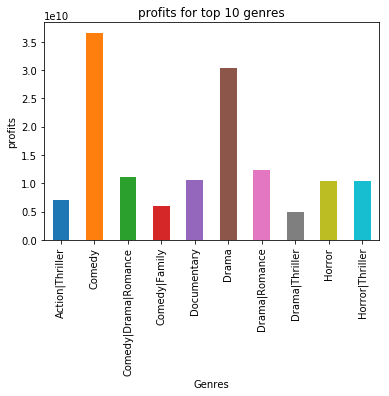

In [104]:
#create new data frame for top 10 genres
df_genres=df_tmdb.query('genres in["Drama","Comedy","Documentary","Drama|Romance","Horror|Thriller","Horror","Comedy|Drama|Romance","Drama|Thriller","Comedy|Family","Action|Thriller"]')

#represent sum of revenue for top 10 genres
df_genres.groupby('genres')['revenue'].sum().plot(kind='bar',title='profits for top 10 genres')

# labels 
plt.xlabel('Genres')
plt.ylabel('profits');

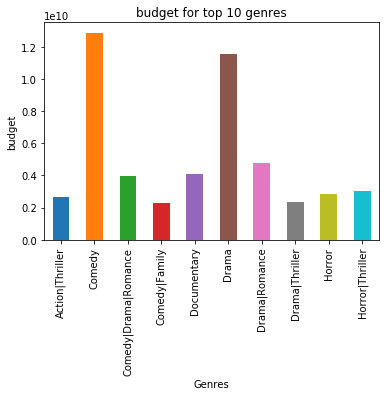

In [103]:
#represent sum  of budget for top 10 genres
df_genres.groupby('genres')['budget'].sum().plot(kind='bar',title='budget for top 10 genres')
#labels 

plt.xlabel('Genres')
plt.ylabel('budget');

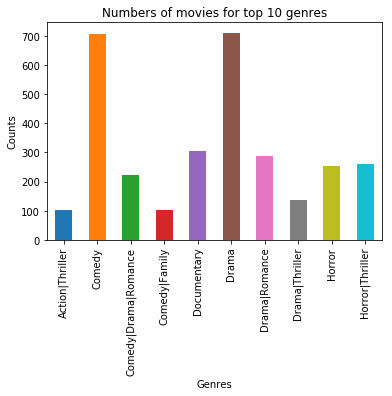

In [102]:
#represent counts for top 10  genres
df_genres.groupby('genres')['original_title'].count().plot(kind='bar',title='Numbers of movies for top 10 genres')
#labels 

plt.xlabel('Genres')
plt.ylabel('Counts');

# finding
>Comedy and Drama are the winning horse in 3 graphs,(maybe the theater loge happy face and sad face because of that)/

>the compareson between other tyes is normal.

# Question 3 For top 10 directors in century 21 ,How many moives they directed ? what 's the revenue for each one of them?

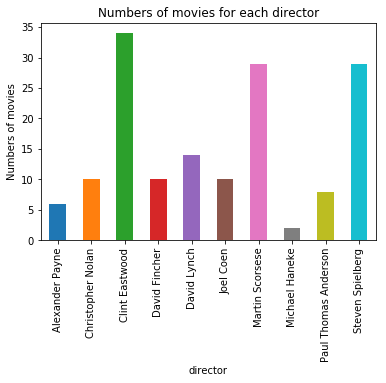

In [101]:
#create new data frame for top 10 directors acordding to https://www.imdb.com/list/ls006541285/
df_director=df_tmdb.query('director in["Clint Eastwood","Martin Scorsese","Paul Thomas Anderson","David Fincher","Joel Coen","David Lynch","Christopher Nolan","Alexander Payne","Michael Haneke","Steven Spielberg"]')
#represent counts for top 10  directors
df_director.groupby('director')['original_title'].count().plot(kind='bar',title='Numbers of movies for each director')
#labels 

plt.xlabel('director')
plt.ylabel('Numbers of movies');

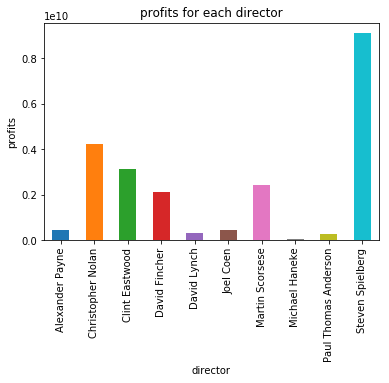

In [100]:
#profits for top 10  directors
df_director.groupby('director')['revenue'].sum().plot(kind='bar',title='profits for each director')

#labels 
plt.xlabel('director')
plt.ylabel('profits');

# Finding 
> they are top but they didn't have high profit as shown with Clint Eastwood.

>steven Spirlberg is the best from two prespectives.

### Question 4 What is the name ,revenue,budget and gender for the best and worst movies from revenue perspective?

In [31]:

df_tmdb[df_tmdb.revenue == df_tmdb.revenue.max()][['original_title','genres','budget','revenue']]


,original_title,genres,budget,revenue
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,237000000.0,2.781506e+09


In [33]:

df_tmdb[df_tmdb.revenue == df_tmdb.revenue.min()][['original_title','genres','budget','revenue']]


,original_title,genres,budget,revenue
5067,Shattered Glass,Drama|History,6000000.0,2.0
8142,Mallrats,Romance|Comedy,6000000.0,2.0


# Finding
>Avatar is the best 

>Shattered Glass and Mallrats are sharing failures

# Question 5 what's the correlation between budget and revenue?


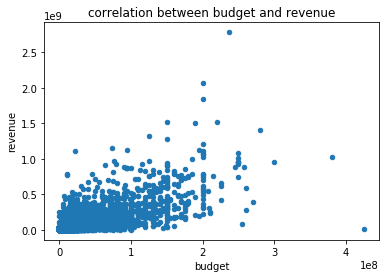

In [99]:
#represent correlation between budget & revenue (positive correlation )
df_tmdb.plot(x='budget',y='revenue',kind='scatter',title='correlation between budget and revenue') ;

# Finding

> there is positive correlation between budget and revenue

# Question 6 what's the correlation between runtime and budget?

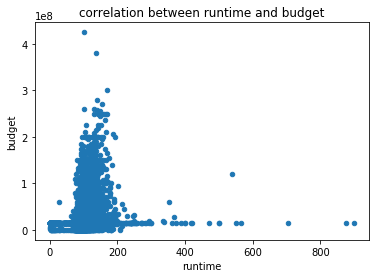

In [108]:
#represent correlation between runtime & budget (No correlation )
df_tmdb.plot(x='runtime',y='budget',kind='scatter',title='correlation between runtime and budget') ;


# Finding

> there is No correlation between runtime and budget

# Question 7  what's the distribution  of revenue and budget?

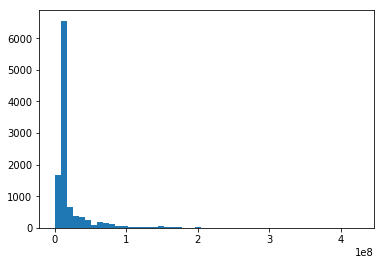

In [107]:
#represent distribution of budget
plt.hist(df_tmdb.budget ,bins=50)
plt.show()

# Finding
> most of budget shown in left side

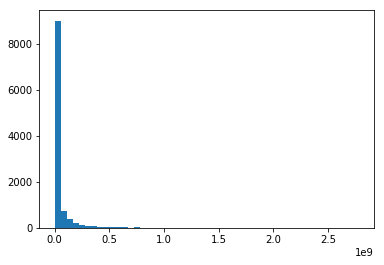

In [52]:
#represent distribution of revenue
plt.hist(df_tmdb.revenue ,bins=50)

plt.show()

# Finding
> most of revenue shown in left side

<a id='conclusions'></a>
## Conclusions
>from answering Q1 : 2015 was the hightest year in last 10 years , according to that producers should focuse to produce the top genres on it.

>from answering Q2 : understand behavior of genres have more than 100 movies on it, frist Drama & Comedy are the best from revenue prespective they retrive more than budget.

>from answering Q3 : understand behavior of top 10 directors in century 21 , some of them direct many movies with hight revenue ond some are oppesit.

>from answering Q4 : report best and worst movies , special in worst movies there are more than 1.

>from answering Q5 : see correlation between budget and revenue ,positive correlation.

>from answering Q6 : see correlation between  runtime & budget ,No correlation .

>from answering Q7 : see revenue and budget are increace in left side .

# Limitations

>1- Data frame did not contain rate for every movies, that was help to segment movies to high or medium or low movies

>2-if data frame contain numbers of actors in cast, that was help to analyse revenue from perspective of numbers of actors inside movie, made higher revenue or not

>3-Data fram did not contain kpi to determine movie is festival movie or fans movie that was help to analyse revenue and budget from diffrent perspectives



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0